# Linear Regression
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*
## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_immunities          1206 non-null   int64  
 1   hp                      1206 non-null   int64  
 2   land_speed              1206 non-null   float64
 3   reflex                  1206 non-null   int64  
 4   cha                     1206 non-null   int64  
 5   book                    1206 non-null   object 
 6   str                     1206 non-null   int64  
 7   con                     1206 non-null   int64  
 8   fortitude               1206 non-null   int64  
 9   will                    1206 non-null   int64  
 10  level                   1206 non-null   int64  
 11  ac                      1206 non-null   int64  
 12  perception              1206 non-null   int64  
 13  focus                   1206 non-null   int32  
 14  wis                     1206 non-null   

In [3]:
df.head()

,num_immunities,hp,land_speed,reflex,cha,book,str,con,fortitude,will,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,3,215,30.0,19,1,Pathfinder Bestiary,7,5,22,17,...,0,0,0,0,0,0,23,22.0,0,0.0
1,0,220,35.0,14,1,Pathfinder Bestiary,9,5,21,16,...,0,0,0,0,0,0,23,22.0,0,0.0
2,0,175,30.0,17,-2,Pathfinder Bestiary,7,6,20,15,...,0,0,0,0,0,0,21,16.0,0,0.0
3,3,315,50.0,29,6,Pathfinder Bestiary,7,5,30,32,...,1,0,1,0,0,0,33,31.5,0,0.0
4,0,20,0.0,10,1,Pathfinder Bestiary,-5,1,6,4,...,1,0,0,0,0,0,0,0.0,8,5.0


## Preprocessing and train test split

In [4]:
from sklearn.preprocessing import MinMaxScaler


columns = [col for col in df.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(scaler.fit_transform(df[columns]))
min_max_df["book"] = df["book"]
min_max_df["level"] = df["level"]

In [5]:
min_max_df.head()

,num_immunities,hp,land_speed,reflex,cha,str,con,fortitude,will,ac,...,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg,book,level
0,0.1875,0.386447,0.250000,0.463415,0.3750,0.705882,0.416667,0.500000,0.395349,0.456522,...,0.0,0.0,0.0,0.0,0.489362,0.385965,0.000000,0.000000,Pathfinder Bestiary,10
1,0.0000,0.395604,0.291667,0.341463,0.3750,0.823529,0.416667,0.477273,0.372093,0.434783,...,0.0,0.0,0.0,0.0,0.489362,0.385965,0.000000,0.000000,Pathfinder Bestiary,10
2,0.0000,0.313187,0.250000,0.414634,0.1875,0.705882,0.500000,0.454545,0.348837,0.369565,...,0.0,0.0,0.0,0.0,0.446809,0.280702,0.000000,0.000000,Pathfinder Bestiary,8
3,0.1875,0.569597,0.416667,0.707317,0.6875,0.705882,0.416667,0.681818,0.744186,0.717391,...,0.2,0.0,0.0,0.0,0.702128,0.552632,0.000000,0.000000,Pathfinder Bestiary,17
4,0.0000,0.029304,0.000000,0.243902,0.3750,0.000000,0.083333,0.136364,0.093023,0.173913,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.186047,0.081967,Pathfinder Bestiary,1


### Chronological split

In [6]:
from training.splitting_dataset import split_dataframe

os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(min_max_df, test_size=0.31)
os.chdir("../notebooks/models/linear_regression")

In [7]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [8]:
y_train = y_train.astype("int64")
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 841 entries, 0 to 840
Series name: level
Non-Null Count  Dtype
--------------  -----
841 non-null    int64
dtypes: int64(1)
memory usage: 13.1 KB


### Random split

In [9]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(min_max_df, chronological_split=False, test_size=0.25)

In [10]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Linear Regression
### With chronological split

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict = model.predict(X_test)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2 = r2_score(y_train, y_pred_train)
print(f"R2 score:{r2:.2f}")

R2 score:0.99


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.43
RMSE test: 0.74
MAE test: 0.46


In [13]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

###### MAE by level

In [14]:
from training.results import plot_mae_by_level

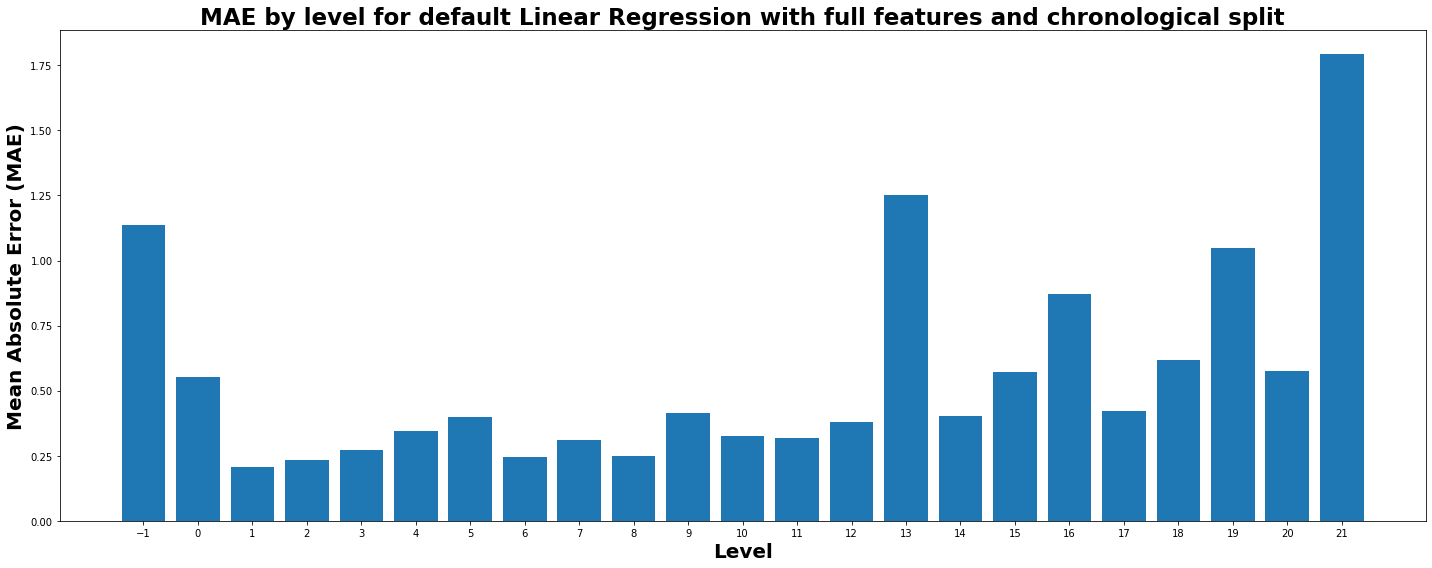

In [15]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default Linear Regression with full features and chronological split",
)

In [16]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.74

Round type: 0.5
RMSE: 0.65

Round type: 0.33
RMSE: 0.64

Round type: 0.45
RMSE: 0.65



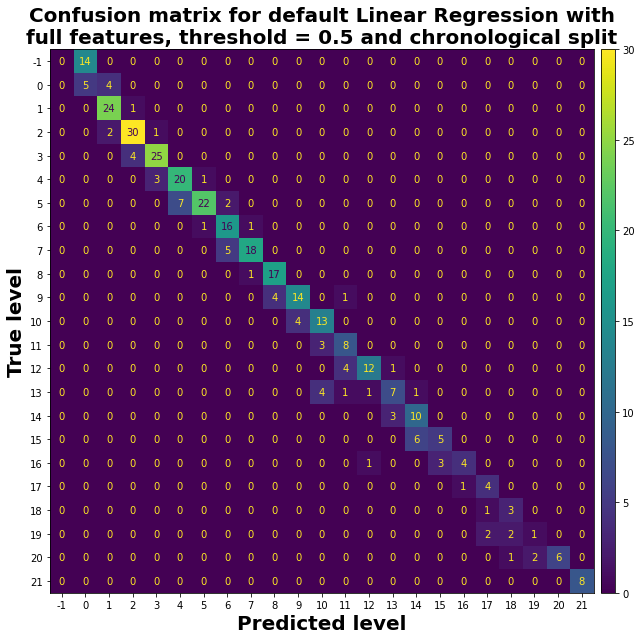

In [17]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for default Linear Regression with\nfull features, threshold = 0.5 and chronological split",
)

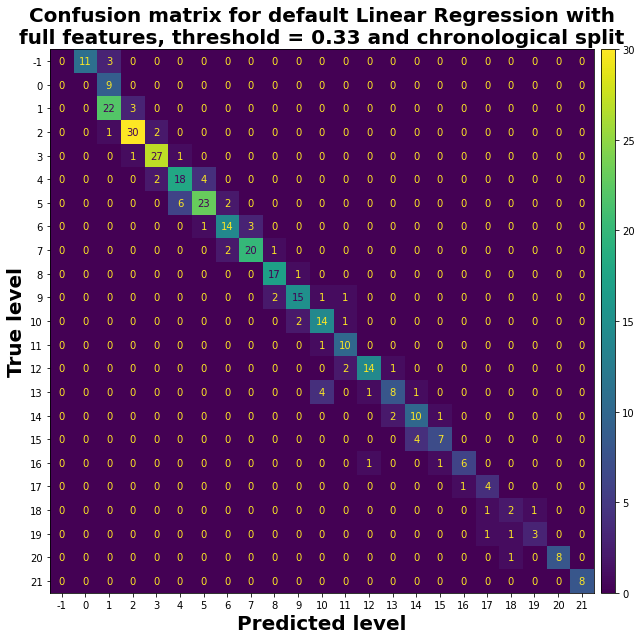

In [18]:
plot_confusion_matrix(
    predict,
    y_test,
    0.33,
    title="Confusion matrix for default Linear Regression with\nfull features, threshold = 0.33 and chronological split",
)

### With random split

In [19]:
model = LinearRegression()
model.fit(X_train_random_split, y_train_random_split)

y_pred_train_random_split = model.predict(X_train_random_split)
y_pred_test_random_split = model.predict(X_test_random_split)

r2 = r2_score(y_train_random_split, y_pred_train_random_split)
print(f"R2 score:{r2:.2f}")

R2 score:0.99


In [20]:
rmse_train = mean_squared_error(
    y_train_random_split, y_pred_train_random_split, squared=False
)
rmse = mean_squared_error(y_test_random_split, y_pred_test_random_split, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test_random_split)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.44
RMSE test: 0.57
MAE test: 0.36


In [21]:
results.loc[1] = ["random", "default", "full", rmse, mae]

###### MAE by level

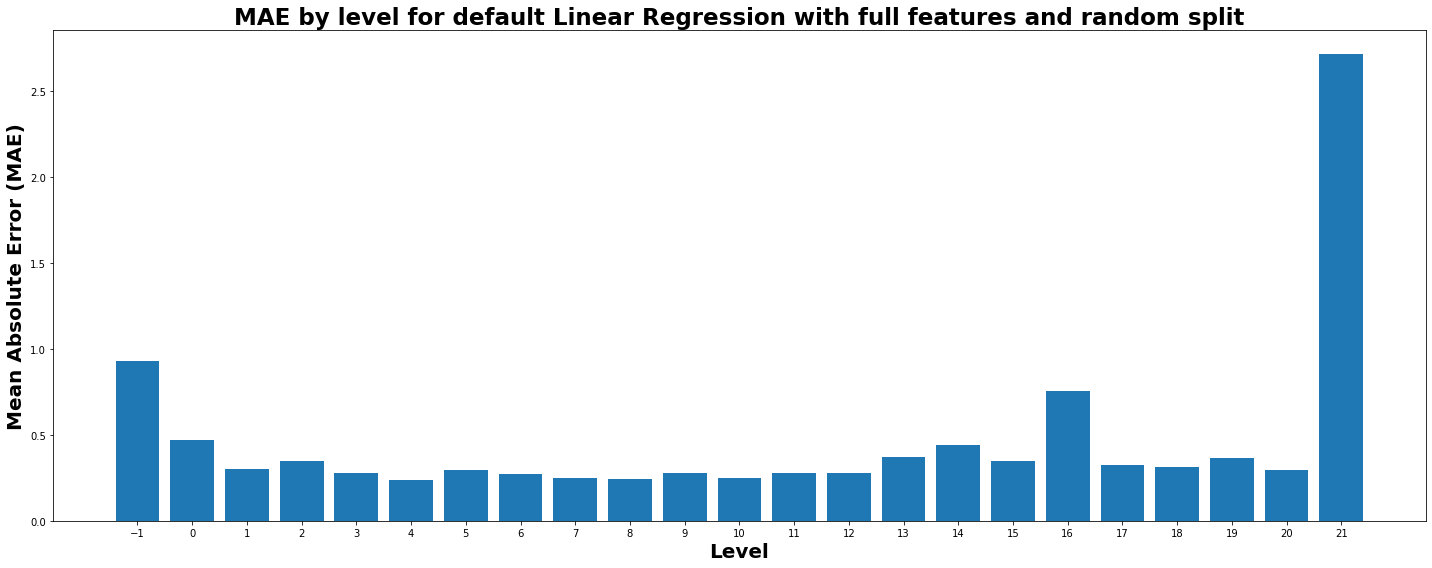

In [22]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for default Linear Regression with full features and random split",
    export=True,
)

In [23]:
evaluate_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 0.57

Round type: 0.5
RMSE: 0.48

Round type: 0.33
RMSE: 0.55

Round type: 0.45
RMSE: 0.48



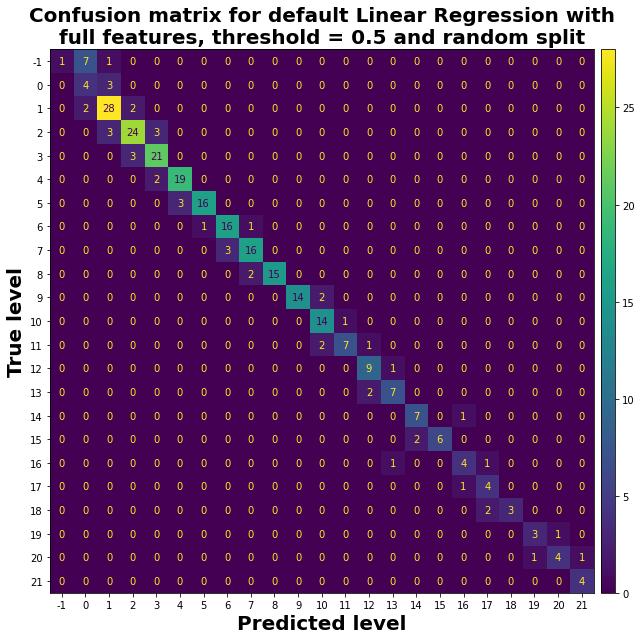

In [24]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for default Linear Regression with\nfull features, threshold = 0.5 and random split",
    export=True,
)

In [25]:
# print(y_pred_test_random_split)
indices = np.where(np.round(y_pred_test_random_split) == 13)
print(indices)
print(y_test_random_split.iloc[indices[0]])

(array([ 25, 110, 121, 147, 172, 180, 193, 253, 265], dtype=int64),)
1094    13
134     13
77      13
889     16
469     13
631     13
711     13
184     12
85      13
Name: level, dtype: int64


In [26]:
print(X_test_random_split.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1045 to 401
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_immunities          302 non-null    float64
 1   hp                      302 non-null    float64
 2   land_speed              302 non-null    float64
 3   reflex                  302 non-null    float64
 4   cha                     302 non-null    float64
 5   str                     302 non-null    float64
 6   con                     302 non-null    float64
 7   fortitude               302 non-null    float64
 8   will                    302 non-null    float64
 9   ac                      302 non-null    float64
 10  perception              302 non-null    float64
 11  focus                   302 non-null    float64
 12  wis                     302 non-null    float64
 13  dex                     302 non-null    float64
 14  int                     302 non-null   

In [27]:
print(X_test_random_split.loc[889])

num_immunities            0.187500
hp                        0.377289
land_speed                0.416667
reflex                    0.756098
cha                       0.875000
str                       0.529412
con                       0.416667
fortitude                 0.568182
will                      0.651163
ac                        0.652174
perception                0.608696
focus                     1.000000
wis                       0.666667
dex                       0.875000
int                       0.600000
electricity_resistance    0.000000
cold_resistance           0.000000
piercing_resistance       0.000000
physical_resistance       0.000000
all-damage_resistance     0.000000
acid_resistance           0.000000
bludgeoning_resistance    0.000000
fire_resistance           0.000000
slashing_resistance       0.000000
mental_resistance         0.000000
poison_resistance         0.000000
fire_weakness             0.000000
good_weakness             0.000000
evil_weakness       

In [28]:
print(df.loc[889])

num_immunities                                3
hp                                          210
land_speed                                 50.0
reflex                                       31
cha                                           9
book                      Pathfinder Bestiary 3
str                                           4
con                                           5
fortitude                                    25
will                                         28
level                                        16
ac                                           38
perception                                   28
focus                                         3
wis                                           6
dex                                           9
int                                           4
electricity_resistance                        0
cold_resistance                               0
piercing_resistance                           0
physical_resistance                     

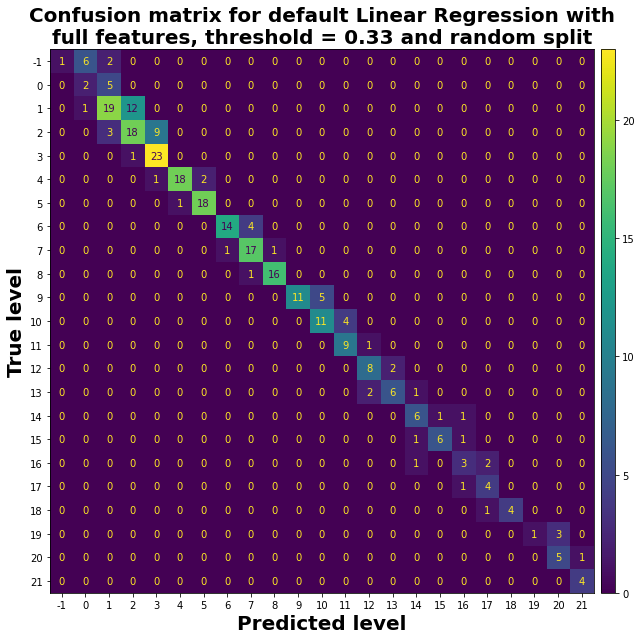

In [29]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    0.33,
    title="Confusion matrix for default Linear Regression with\nfull features, threshold = 0.33 and random split",
)

## Tuning (ridge, LASSO)

### With chronological split

In [30]:
from sklearn.linear_model import RidgeCV, LassoCV
from training.results import assess_regression_model


reg_ridge_cv = RidgeCV(alphas=np.linspace(0.1, 100, 1000))
reg_lasso_cv = LassoCV(n_alphas=1000, random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train, y_train)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train,
    np.array(y_train).reshape(
        y_train.size,
    ),
)

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

print(f"Ridge CV alpha: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()

print("Linear Regression")
assess_regression_model(reg_linear, X_train, X_test, y_train, y_test, r2=True)

print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[2] = ["chronological", "Ridge", "full", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[3] = ["chronological", "Lasso", "full", rmse, mae]

Ridge CV alpha: 0.5000
Lasso CV alpha: 0.0024

Linear Regression
R2: 0.99
RMSE train: 0.43
RMSE test: 0.74
MAE test: 0.46

Ridge:
R2: 0.99
RMSE train: 0.43
RMSE test: 0.76
MAE test: 0.48

Lasso:
R2: 0.99
RMSE train: 0.46
RMSE test: 0.70
MAE test: 0.45



###### MAE by level Ridge

In [31]:
y_pred_test = reg_ridge_cv.predict(X_test)

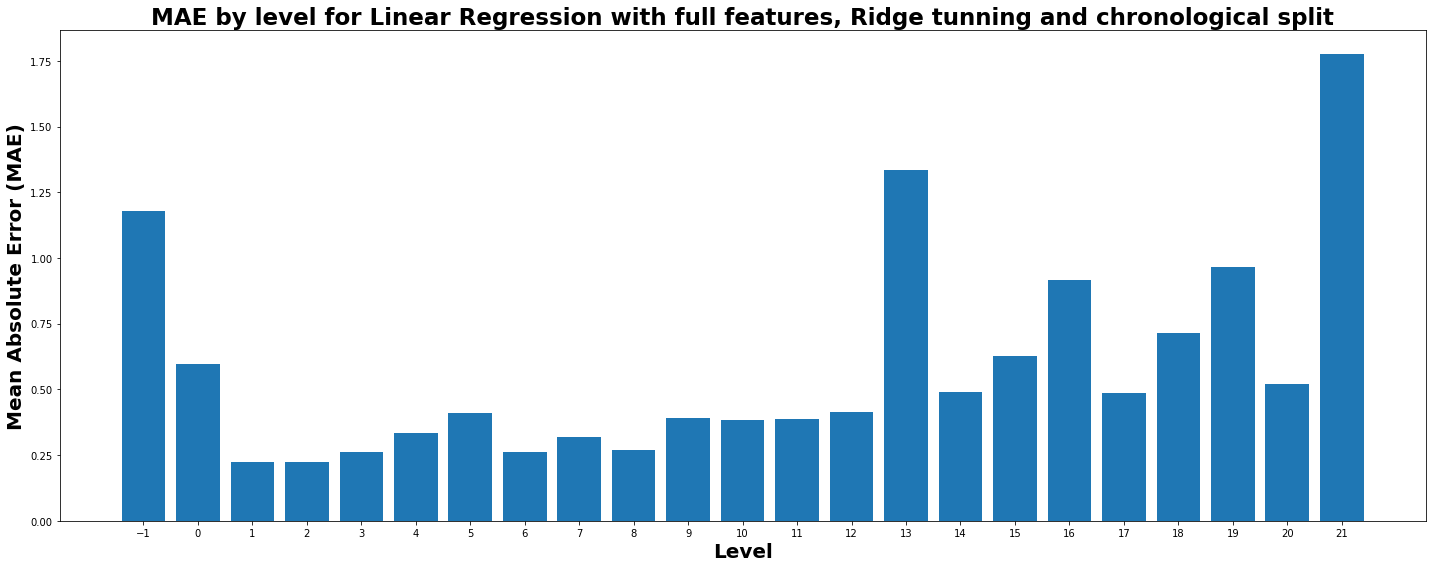

In [32]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with full features, Ridge tunning and chronological split",
)

###### MAE by level LASSO

In [33]:
y_pred_test = reg_lasso_cv.predict(X_test)

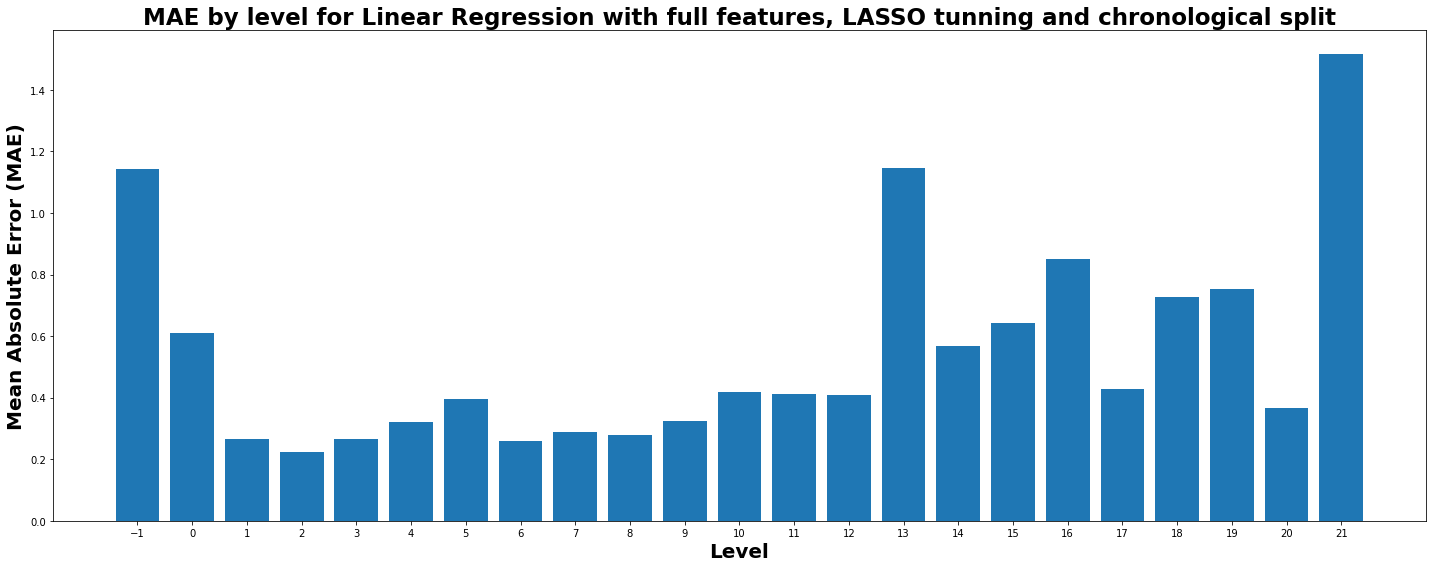

In [34]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with full features, LASSO tunning and chronological split",
)

<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

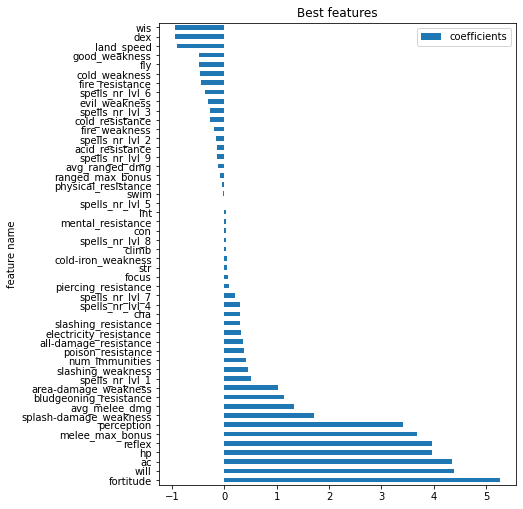

In [35]:
feature_names = X_train.columns

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": columns,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(
    x="feature name", y="coefficients", title="Best features", figsize=(6.4, 8.5)
)

In [36]:
sorted(feature_names[reg_lasso_cv.coef_ == 0])

['acid_resistance',
 'area-damage_weakness',
 'avg_ranged_dmg',
 'climb',
 'cold-iron_weakness',
 'con',
 'electricity_resistance',
 'evil_weakness',
 'fire_weakness',
 'int',
 'mental_resistance',
 'physical_resistance',
 'piercing_resistance',
 'ranged_max_bonus',
 'slashing_resistance',
 'spells_nr_lvl_2',
 'spells_nr_lvl_3',
 'spells_nr_lvl_5',
 'spells_nr_lvl_7',
 'spells_nr_lvl_8',
 'spells_nr_lvl_9',
 'str',
 'swim']

### With random split

In [37]:
from sklearn.linear_model import RidgeCV, LassoCV

reg_ridge_cv = RidgeCV(alphas=np.linspace(1e-3, 1, 10000))
reg_lasso_cv = LassoCV(alphas=np.linspace(1e-4, 1e-1, 1000), random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train_random_split, y_train_random_split)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train_random_split,
    np.array(y_train_random_split).reshape(
        y_train_random_split.size,
    ),
)

print(f"Ridge CV alphas: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()
print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[4] = ["random", "Ridge", "full", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[5] = ["random", "Lasso", "full", rmse, mae]

Ridge CV alphas: 0.2592
Lasso CV alpha: 0.0011

Ridge:
R2: 0.99
RMSE train: 0.45
RMSE test: 0.59
MAE test: 0.35

Lasso:
R2: 0.99
RMSE train: 0.45
RMSE test: 0.56
MAE test: 0.35



###### MAE by level Ridge

In [38]:
y_pred_test_random_split = reg_ridge_cv.predict(X_test_random_split)

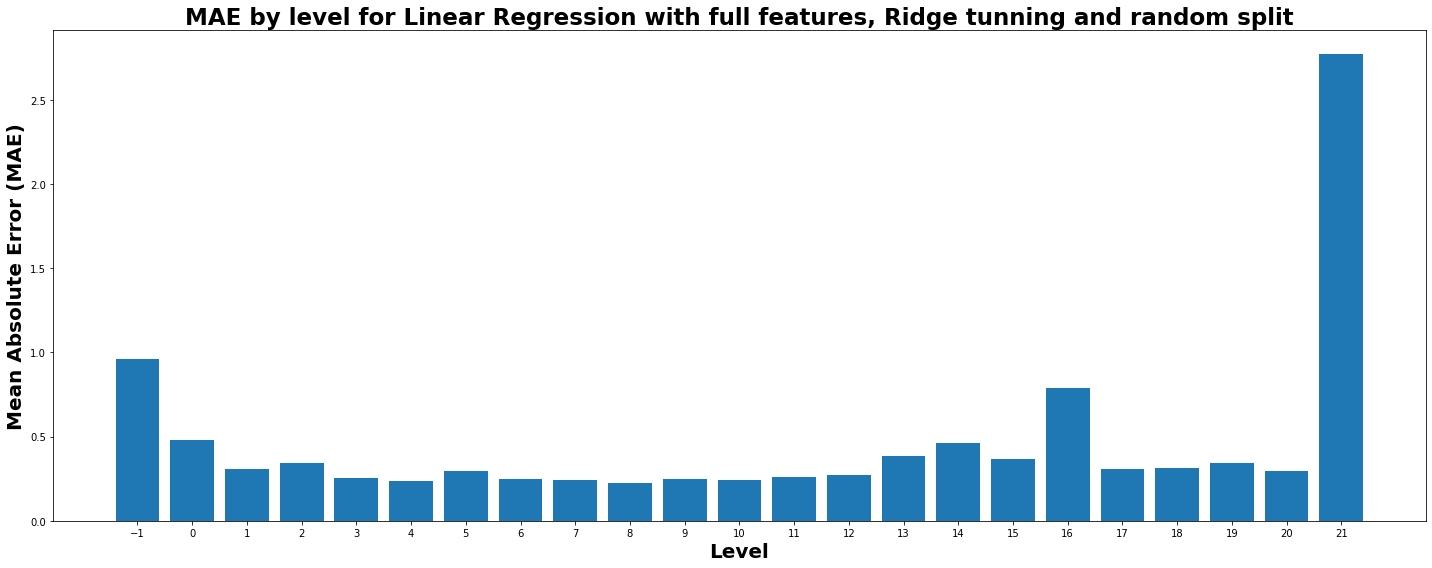

In [39]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with full features, Ridge tunning and random split",
)

###### MAE by level LASSO

In [40]:
y_pred_test_random_split = reg_lasso_cv.predict(X_test_random_split)

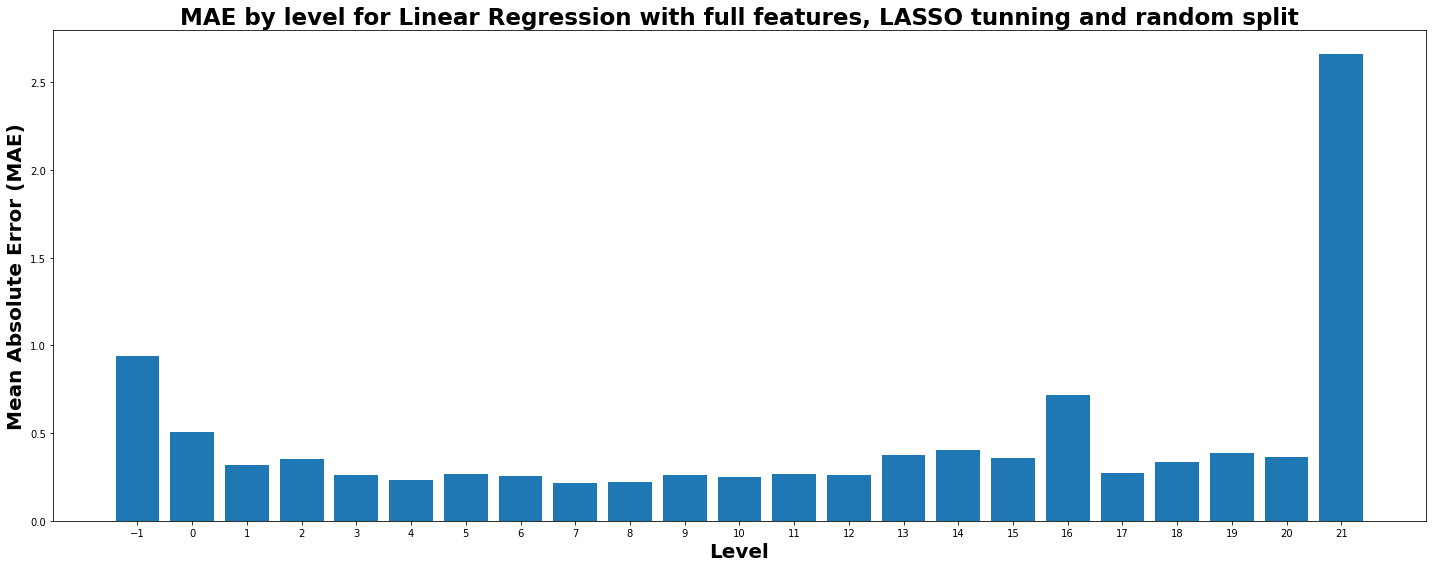

In [41]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with full features, LASSO tunning and random split",
)

<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

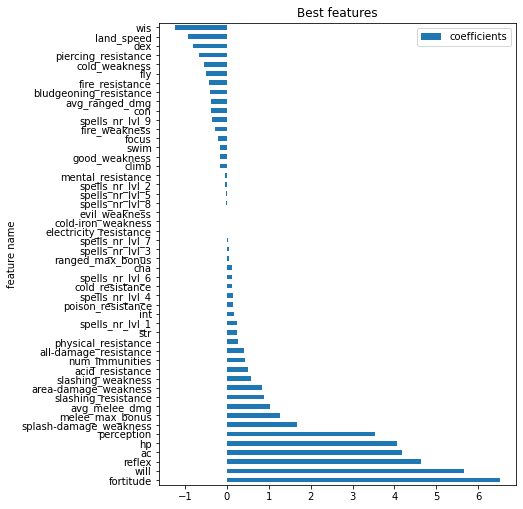

In [42]:
feature_names = X_train.columns

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": columns,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(
    x="feature name", y="coefficients", title="Best features", figsize=(6.4, 8.5)
)

In [43]:
eliminated_features = sorted(feature_names[reg_lasso_cv.coef_ == 0])
print(eliminated_features)

['area-damage_weakness', 'cold-iron_weakness', 'cold_resistance', 'electricity_resistance', 'evil_weakness', 'mental_resistance', 'spells_nr_lvl_2', 'spells_nr_lvl_5', 'spells_nr_lvl_6', 'spells_nr_lvl_7', 'spells_nr_lvl_8']


## Summary

In [44]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.742648,0.457334
1,random,default,full,0.573386,0.356771
2,chronological,Ridge,full,0.762007,0.475612
3,chronological,Lasso,full,0.696185,0.454366
4,random,Ridge,full,0.585067,0.354016
5,random,Lasso,full,0.561424,0.349999


In [45]:
from training.results import plot_summary

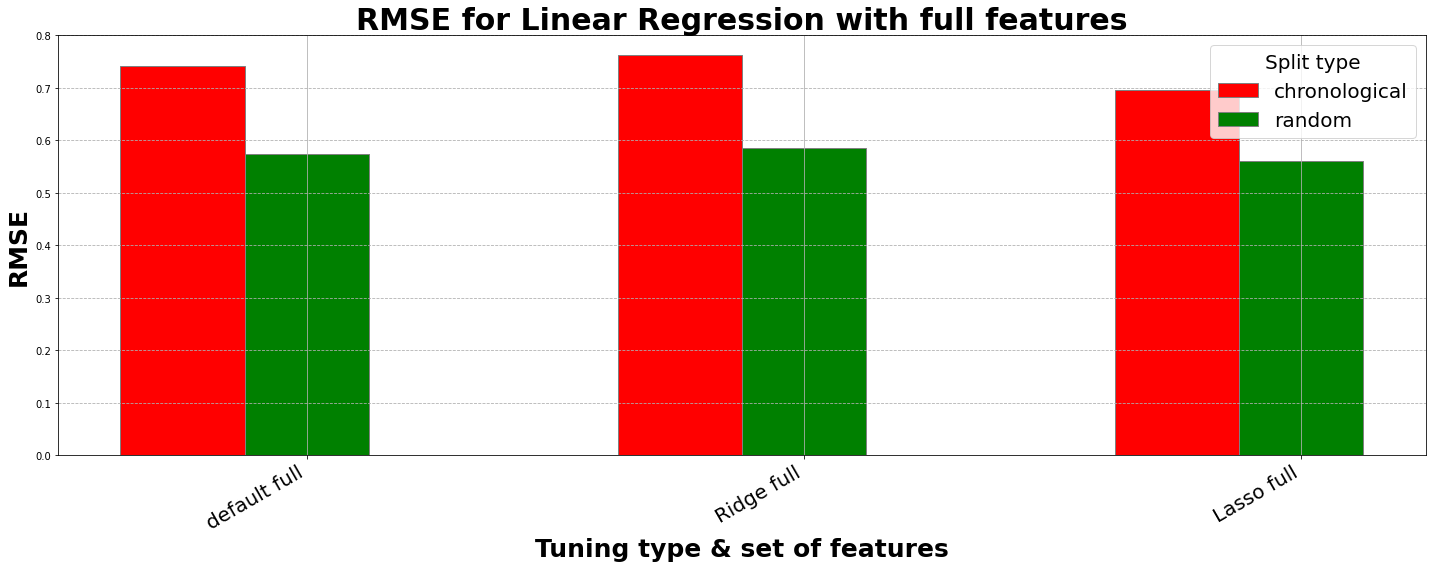

In [46]:
plot_summary(results, "RMSE", title="RMSE for Linear Regression with full features")

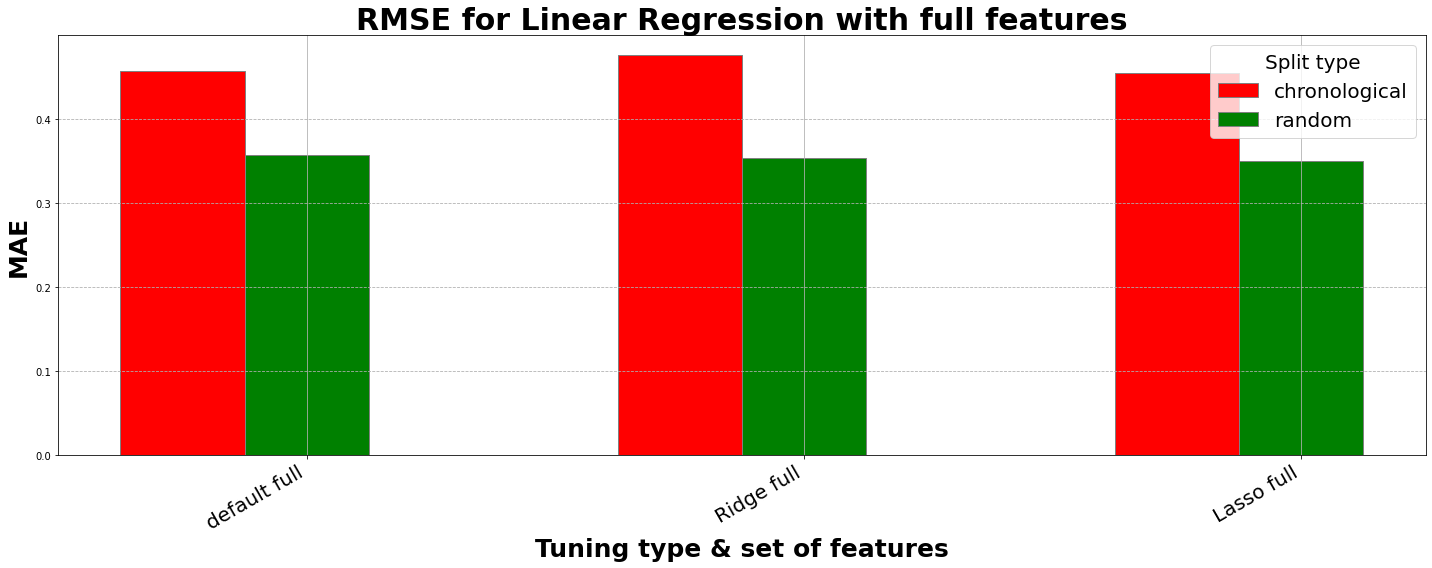

In [47]:
plot_summary(results, "MAE", title="RMSE for Linear Regression with full features")

In [48]:
results.to_csv("./linear_regression_full_results.csv")